## Exercise (Normal Distribution and Z Score for Outlier Removal)

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

1. Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles
1. After removing outliers in step 1, you get a new dataframe.
1. On step(2) dataframe, use 4 standard deviation to remove outliers
1. Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram
1. On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result


In [5]:
import pandas as pd
import seaborn as sn
import numpy as np

In [2]:
df = pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [3]:
df.shape

(13200, 7)

In [4]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

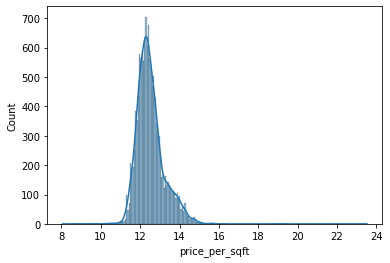

In [6]:

sn.histplot(np.log2(df.price_per_sqft),kde=True)

In [22]:
values[:15]

array([ 267,  371,  416,  500,  573,  729,  729,  875,  912, 1166, 1250,
       1250, 1300, 1363, 1379])

In [29]:
values = df.price_per_sqft.values
values.sort()
percentile = values[np.ceil((0.001 * len(values))).astype(int)]
percentile
# This is correct output but np.percentile() finds something more accurate.

1379

In [8]:
import numpy as np
np.percentile(df.price_per_sqft,0.1)

1366.184

In [31]:
low = np.percentile(df.price_per_sqft,0.1)
high = np.percentile(df.price_per_sqft,99.9)

In [33]:
df_percentile = df[(df.price_per_sqft>low) & (df.price_per_sqft<high)]
df_percentile.shape,df.shape

((13172, 7), (13200, 7))

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

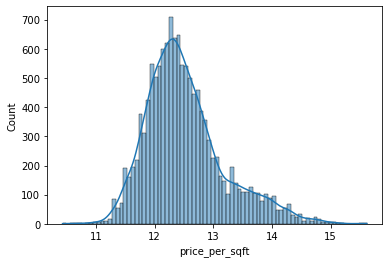

In [34]:
sn.histplot(np.log2(df_percentile.price_per_sqft),kde=True)

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

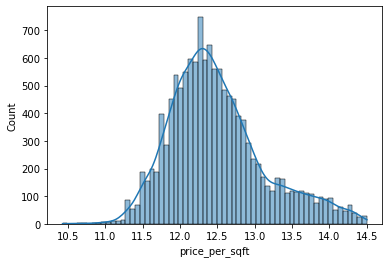

In [38]:
# 4 standard deviation removal

low = df_percentile.price_per_sqft.mean()-4*df_percentile.price_per_sqft.std()
high = df_percentile.price_per_sqft.mean()+4*df_percentile.price_per_sqft.std()

df_std = df_percentile[(df_percentile.price_per_sqft>low) & (df_percentile.price_per_sqft<high)]
sn.histplot(np.log2(df_std.price_per_sqft),kde=True)

In [43]:
# z_score
df_std['zscore'] = (df_std.price_per_sqft-df_std.price_per_sqft.mean())/df_std.price_per_sqft.std()
df_std.head()

/tmp/ipykernel_13851/562391628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_std['zscore'] = (df_std.price_per_sqft-df_std.price_per_sqft.mean())/df_std.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
14,Sarjapur,3 Bedroom,2250.0,3.0,148.0,3,1379,-1.453787
15,Mysore Road,2 BHK,1175.0,2.0,73.5,2,1400,-1.447765
16,Bisuvanahalli,3 BHK,1180.0,3.0,48.0,3,1495,-1.420527
17,Raja Rajeshwari Nagar,3 BHK,1540.0,3.0,60.0,3,1538,-1.408197
18,other,3 BHK,2770.0,4.0,290.0,3,1578,-1.396728


In [54]:
df_zscore = df_std[(df_std.zscore>-3) & (df_std.zscore<3)]

df_zscore.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
14,Sarjapur,3 Bedroom,2250.0,3.0,148.0,3,1379,-1.453787
15,Mysore Road,2 BHK,1175.0,2.0,73.5,2,1400,-1.447765
16,Bisuvanahalli,3 BHK,1180.0,3.0,48.0,3,1495,-1.420527
17,Raja Rajeshwari Nagar,3 BHK,1540.0,3.0,60.0,3,1538,-1.408197
18,other,3 BHK,2770.0,4.0,290.0,3,1578,-1.396728


In [55]:
print(df_std.shape,df_zscore.shape)

(13047, 8) (12727, 8)


<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

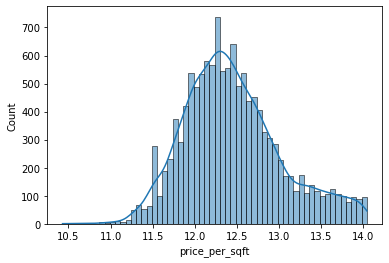

In [56]:
sn.histplot(np.log2(df_zscore.price_per_sqft),kde=True)